# Multivariate Gaussians

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import det, inv

In [2]:
%config InlineBackend.figure_format = "retina"

The formula for the multivariate Gaussian is given by

$$
    \mathcal{N}({\bf x}\vert\boldsymbol\mu, \boldsymbol\Sigma) = (2\pi)^{-M/2}\vert\boldsymbol\Sigma\vert^{-1/2}\exp\left(-\frac{1}{2}({\bf x} - \boldsymbol\mu)^T\boldsymbol\Sigma^{-1}({\bf x} - \boldsymbol\mu)\right)
$$

Where
* $\boldsymbol\Sigma$ is a positive definite matrix

In [3]:
def mvg_density(x, mu, S):
    M = len(mu)
    dispertion = X - mu[:, None, None]
    dispertion = np.einsum("nij,nm,mij->ij", dispertion, inv(S), dispertion)
    return np.exp(-dispertion / 2) / np.sqrt((2 * np.pi) ** M * det(S))

In [4]:
X = np.mgrid[-3:3:.01, -3:3:0.01]

In [5]:
S_collection = np.array([
    [
        [2, 0],
        [0, 1]
    ],
    
    [
        [4, -2],
        [-4, 4]
    ],
    
    [
        [4, 2],
        [4, 4]
    ],
    
    [
        [1, 0],
        [0, 4]
    ]
    
])
mu = np.array([0, 0])

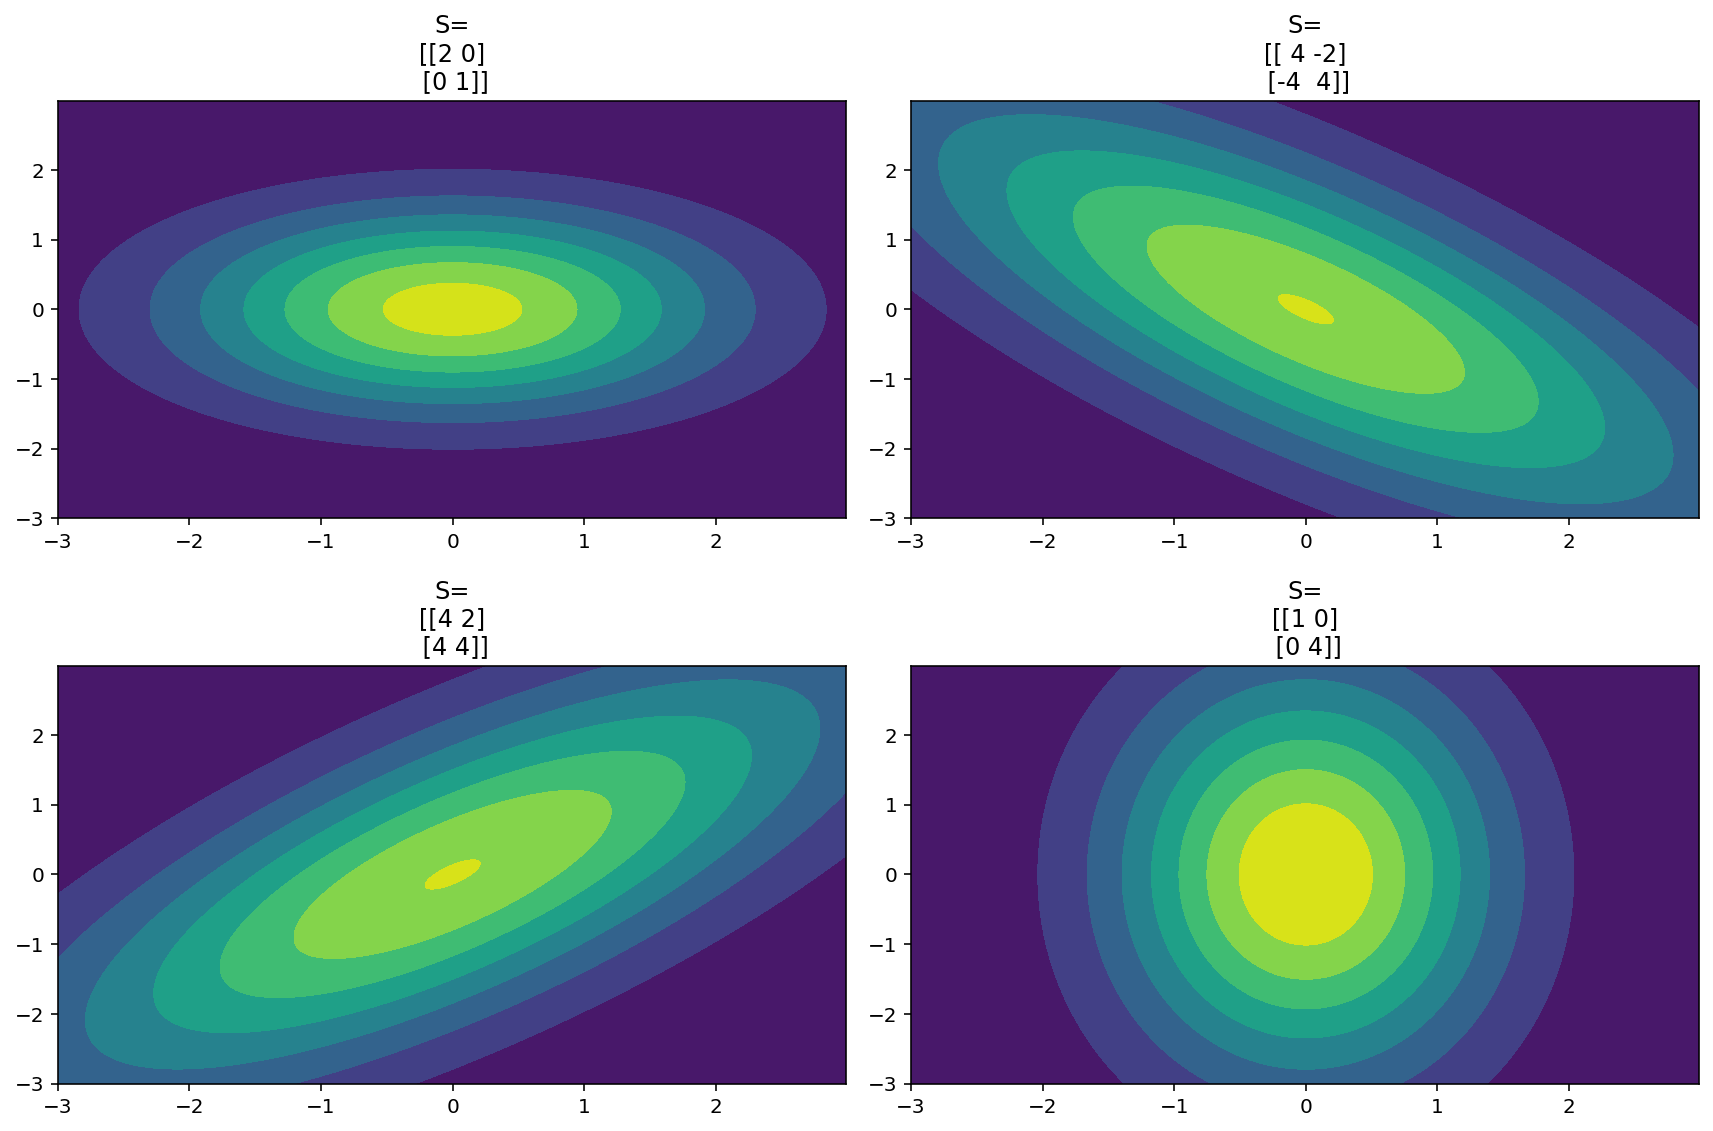

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.ravel()
for axi, S in zip(ax, S_collection):
    axi.contourf(*X, mvg_density(X, mu, S));
    axi.set_title(f"S=\n{S}")
plt.tight_layout()